In [69]:
import pandas as pd

df2021 = pd.read_csv('../../data/raw/world-happiness-report-2021.csv')
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [70]:
temp = df2021['Dystopia + residual']
df2021 = df2021.drop('Dystopia + residual',axis = 'columns')
df2021.insert(13,'Dystopia + resiudal',temp)

In [71]:
df2020 = pd.read_csv('../../data/raw/world-happiness-report-2020.csv')
df = df2021.rename(columns={'Ladder score':'Ladder score 2021'})
df.insert(3,'Ladder score 2020',df2020['Ladder score'])
df.insert(4,'Ladder score difference (2021 subtracted by 2020)',df['Ladder score 2021'] - df['Ladder score 2020'])
temp = df['Standard error of ladder score']
df = df.drop('Standard error of ladder score',axis='columns')
df.insert(3,'Standard error of ladder score 2021',temp)
df.insert(5,'Standard error of ladder score 2020',df2020['Standard error of ladder score'])
df


,Country name,Regional indicator,Ladder score 2021,Standard error of ladder score 2021,Ladder score 2020,Standard error of ladder score 2020,Ladder score difference (2021 subtracted by 2020),upperwhisker,lowerwhisker,Logged GDP per capita,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + resiudal,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.8087,0.031156,0.0333,7.904,7.780,10.775,...,-0.098,0.186,2.43,3.253,1.446,1.106,0.741,0.691,0.124,0.481
1,Denmark,Western Europe,7.620,0.035,7.6456,0.033492,-0.0256,7.687,7.552,10.933,...,0.030,0.179,2.43,2.868,1.502,1.108,0.763,0.686,0.208,0.485
2,Switzerland,Western Europe,7.571,0.036,7.5599,0.035014,0.0111,7.643,7.500,11.117,...,0.025,0.292,2.43,2.839,1.566,1.079,0.816,0.653,0.204,0.413
3,Iceland,Western Europe,7.554,0.059,7.5045,0.059616,0.0495,7.670,7.438,10.878,...,0.160,0.673,2.43,2.967,1.482,1.172,0.772,0.698,0.293,0.170
4,Netherlands,Western Europe,7.464,0.027,7.4880,0.034837,-0.0240,7.518,7.410,10.932,...,0.175,0.338,2.43,2.798,1.501,1.079,0.753,0.647,0.302,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.5380,0.070261,-0.0260,3.748,3.276,7.926,...,-0.131,0.915,2.43,1.800,0.451,0.731,0.007,0.405,0.103,0.015
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.5274,0.054158,-0.0604,3.611,3.322,9.782,...,-0.246,0.801,2.43,0.648,1.099,0.724,0.340,0.539,0.027,0.088
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.4789,0.060543,-0.0639,3.548,3.282,7.676,...,0.061,0.167,2.43,1.095,0.364,0.202,0.407,0.627,0.227,0.493
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.4762,0.063210,-0.3312,3.259,3.030,7.943,...,-0.047,0.821,2.43,1.205,0.457,0.649,0.243,0.359,0.157,0.075


<AxesSubplot:title={'center':'Boxplot of Ladder Score for Regions in 2020'}, xlabel='Ladder score 2020', ylabel='Regional indicator'>

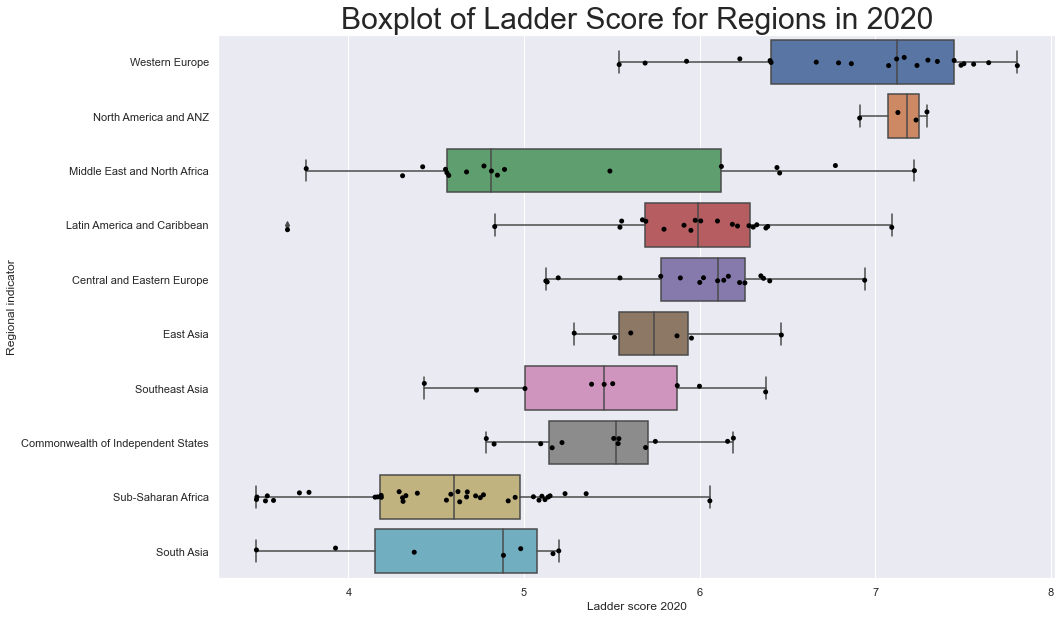

In [72]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(data=df,x=df['Ladder score 2020'],y=df['Regional indicator']).set_title('Boxplot of Ladder Score for Regions in 2020',fontsize=30)
sns.stripplot(data = df, x=df['Ladder score 2020'],y=df['Regional indicator'],color = 'black')

In [73]:


# Ladder score 2020 of Western Europe
df2020WE = df['Regional indicator']
df2020WE = df2020WE.to_frame()
df2020WE.drop([i for i in range(0,149) if df2020WE.iloc[i].item()!='Western Europe'],axis='rows')
lst = list(df2020WE.index.values)
df2020WE = df['Ladder score 2020']
df2020WE = df2020WE.to_frame()
df2020WE.insert(0,'Country name',df['Country name'])
df2020WE =  df2020WE.drop([i for i in range(0,149) if i not in lst],axis='rows')
sns.set(rc = {'figure.figsize':(350,70)})
sns.barplot(data=df2020WE, x="Country name", y='Ladder score 2020').set_title('Bar Graph of Ladder score of Western Europe in 2020',fontsize=250)

Text(0.5, 1.0, 'Bar Graph of Ladder score of Western Europe in 2020')

In [74]:
# Ladder score 2021 of Western Europe
df2021WE = df['Regional indicator']
df2021WE = df2021WE.to_frame()
df2021WE.drop([i for i in range(0,149) if df2021WE.iloc[i].item()!='Western Europe'],axis='rows')
lst = list(df2021WE.index.values)
df2021WE = df['Ladder score 2021']
df2021WE = df2021WE.to_frame()
df2021WE.insert(0,'Country name',df['Country name'])
df2021WE =  df2021WE.drop([i for i in range(0,149) if i not in lst],axis='rows')
sns.set(rc = {'figure.figsize':(350,70)})
sns.barplot(data=df2021WE, x="Country name", y='Ladder score 2021').set_title('Bar Graph Ladder score of Western Europe in 2021',fontsize=250)

Text(0.5, 1.0, 'Bar Graph Ladder score of Western Europe in 2021')

In [75]:
# Method for grabbing dataframe of a specific region
def grabRegionalCountriesAndLadderScore(df, region:str, rows:int, year):
    year = str(year)
    dfT = df['Regional indicator']
    dfT = dfT.to_frame()
    dfT = dfT.drop([i for i in range(0,rows) if dfT.iloc[i].item()!=region],axis='rows')
    lst = list(dfT.index.values)
    dfT = df['Ladder score '+year]
    dfT = dfT.to_frame()
    dfT.insert(0,'Country name',df['Country name'])
    dfT = dfT.drop([i for i in range(0,rows) if i not in lst], axis = 'rows')
    return dfT
    

Text(0.5, 1.0, ' Bar Graph Ladder score of Sub-Saharan Africa in 2020')

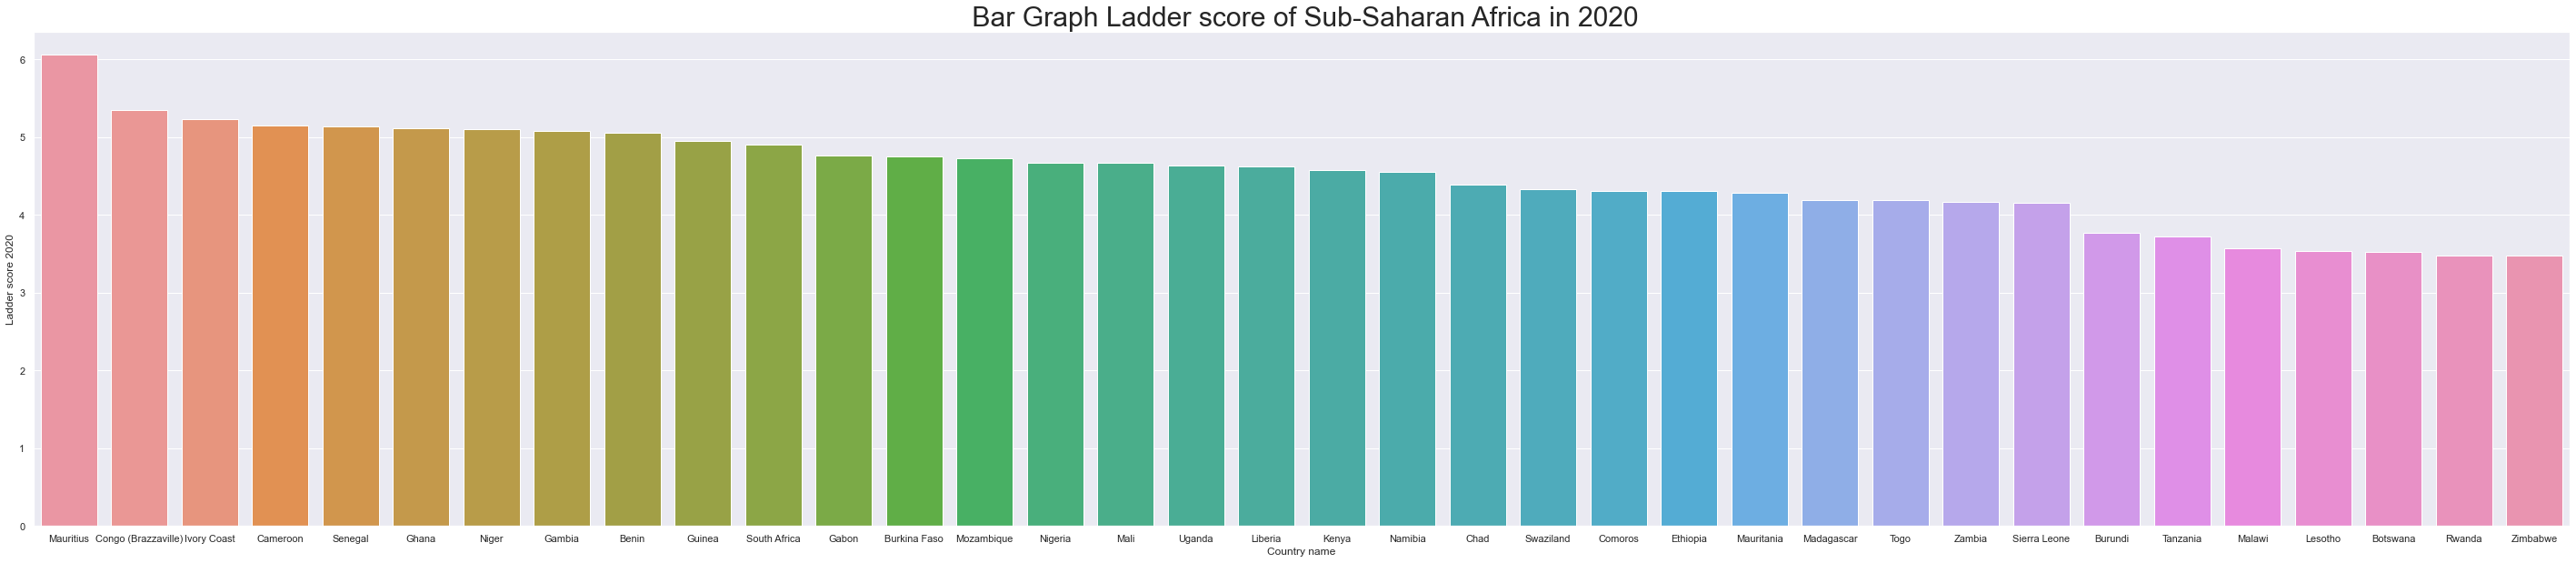

In [76]:
# Ladder score 2020 of Sub-Saharan Africa
df2020SSA=grabRegionalCountriesAndLadderScore(df,'Sub-Saharan Africa',149,2020)

sns.set(rc = {'figure.figsize':(50,10)})
sns.barplot(data=df2020SSA, x="Country name", y='Ladder score 2020').set_title(' Bar Graph Ladder score of Sub-Saharan Africa in 2020',fontsize=30)

Text(0.5, 1.0, 'Bar Graph Ladder score of Sub-Saharan Africa in 2021')

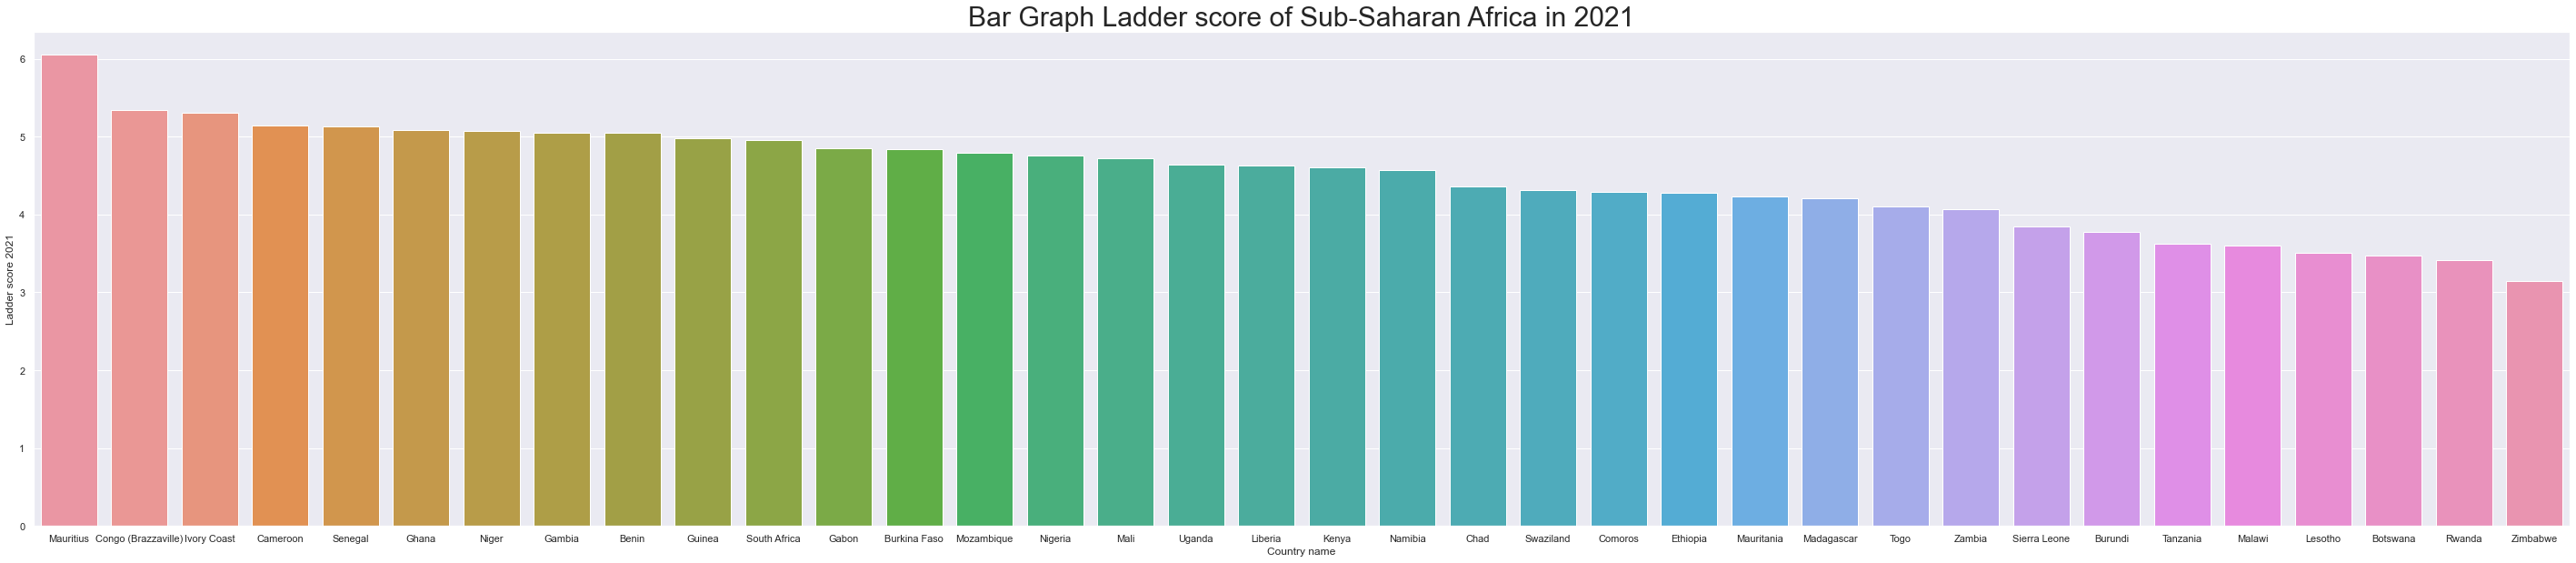

In [78]:
# Ladder score 2021 of Sub-Sahahran Africa
grabRegionalCountriesAndLadderScore(df,'Sub-Saharan Africa',149,2021)
# Graphing
sns.set(rc = {'figure.figsize':(50,10)}) 
sns.barplot(data=df2021SSA, x="Country name", y='Ladder score 2021').set_title('Bar Graph Ladder score of Sub-Saharan Africa in 2021',size=30)